# Earthquake Impact Analysis in Morocco


## Introduction

In this notebook, we conduct a comprehensive analysis of earthquake impact data in Morocco. The project involves data collection, cleaning, merging, and exploratory data analysis (EDA). We explore various datasets related to seismic activity, damage assessment, relief funding, and historical earthquakes in Morocco.

The analysis aims to uncover insights into the geographical distribution of seismic impact, population exposure, relief efforts, and historical patterns. Through interactive visualizations and descriptive statistics, we gain a deeper understanding of the earthquake impact landscape in Morocco.

### Notebooks Overview
1. **Data Collection and Cleaning:** This notebook covers the initial stages of the project, including data scraping, cleaning, and merging.

2. **Exploratory Data Analysis (EDA):** The second notebook focuses on in-depth data exploration and visualization, providing insights into earthquake impact metrics.

3. **Consolidated Analysis and Visualizations:** The final notebook brings together the data preparation, cleaning, merging, and EDA. It serves as a comprehensive overview of the entire project.

Let's start by diving into the first notebook to understand the process of preparing and cleaning the earthquake impact datasets.

## GitHub Repository
This notebook is part of a GitHub repository dedicated to the earthquake impact analysis in Morocco. For more details, please refer to the [GitHub repository](https://github.com/your-username/your-repository).

Feel free to explore the analysis and provide feedback or suggestions for improvement.

#### Section 1:  Data Loading and Cleaning

In this section, we load the earthquake data, perform cleaning operations, and prepare the datasets for further analysis. The steps include geospatial data processing, reverse geocoding to fill missing values, and saving the processed data for future use.

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from geopy.geocoders import Nominatim
import geopandas as gpd
from shapely.geometry import Point
import re


In [25]:
gdf= gpd.read_file(r'C:\Users\lenovo\Desktop\path for data s\earthquake\Taroudant, région de Taroudant, province de Souss Massa\EQ20230909MAR_SHP')

In [26]:
gdf.head()

,SensorDate,Settlement,Notes,EventCode,Main_Dmg,SiteID,SensorID,Confidence,FieldValid,Grouped_Da,StaffID,ImageID_Nu,geometry
0,2023-09-10,Ait Othmane,None,EQ20230909MAR,Possible damage,Building (General / Default),Jilin-1,To Be Evaluated,Not yet field validated,Damaged Buildings,VG,None,POINT (-8.40655 31.16093)
1,2023-09-10,Ait Othmane,None,EQ20230909MAR,Damage,Building (General / Default),Jilin-1,To Be Evaluated,Not yet field validated,Damaged Buildings,VG,None,POINT (-8.40728 31.15985)
2,2023-09-10,Ait Othmane,None,EQ20230909MAR,Damage,Building (General / Default),Jilin-1,To Be Evaluated,Not yet field validated,Damaged Buildings,VG,None,POINT (-8.40648 31.16065)
3,2023-09-10,Ait Othmane,None,EQ20230909MAR,Damage,Building (General / Default),Jilin-1,To Be Evaluated,Not yet field validated,Damaged Buildings,VG,None,POINT (-8.40631 31.16064)
4,2023-09-10,Ait Othmane,None,EQ20230909MAR,Possible damage,Building (General / Default),Jilin-1,To Be Evaluated,Not yet field validated,Damaged Buildings,VG,None,POINT (-8.40649 31.16052)


In [27]:
gdf.drop(['Notes', 'EventCode', 'SiteID', 'SensorID', 'Confidence', 'FieldValid', 'StaffID', 'ImageID_Nu', 'Grouped_Da'], axis=1, inplace=True)

In [28]:
dup=gdf['geometry'].duplicated()
for d in dup:
    if d==True:
        print('yes')
    else:
        pass

In [29]:
gdf

,SensorDate,Settlement,Main_Dmg,geometry
0,2023-09-10,Ait Othmane,Possible damage,POINT (-8.40655 31.16093)
1,2023-09-10,Ait Othmane,Damage,POINT (-8.40728 31.15985)
2,2023-09-10,Ait Othmane,Damage,POINT (-8.40648 31.16065)
3,2023-09-10,Ait Othmane,Damage,POINT (-8.40631 31.16064)
4,2023-09-10,Ait Othmane,Possible damage,POINT (-8.40649 31.16052)
...,...,...,...,...
601,2023-09-10,None,Possible damage,POINT (-8.35950 31.10792)
602,2023-09-10,None,Possible damage,POINT (-8.36112 31.11020)
603,2023-09-10,None,Damage,POINT (-8.39276 31.15422)
604,2023-09-10,None,Possible damage,POINT (-8.39281 31.15415)


In [30]:
import pandas as pd
from geopy.geocoders import Nominatim

# Assuming your DataFrame is named df
# Replace "YourDataFrame.csv" with the actual file path if your data is in a CSV file
# df = pd.read_csv("YourDataFrame.csv")

# Function to reverse geocode and get the location name
def reverse_geocode(lat, lon):
    geolocator = Nominatim(user_agent="reverse_geocoding")
    location = geolocator.reverse((lat, lon), language="en")
    #return location.address.split(",")[0] if location else None
    return location.raw['address'].get('village', None) or location.raw['address'].get('town', None) or location.raw['address'].get('city', None)
# Fill NaN values in "Settlement" based on reverse geocoding
nan_settlement_rows = gdf[gdf['Settlement'].isna()]

for index, row in nan_settlement_rows.iterrows():
    lat, lon = row['geometry'].y, row['geometry'].x
    location_name = reverse_geocode(lat, lon)
    gdf.at[index, 'Settlement'] = location_name


In [31]:
gdf

,SensorDate,Settlement,Main_Dmg,geometry
0,2023-09-10,Ait Othmane,Possible damage,POINT (-8.40655 31.16093)
1,2023-09-10,Ait Othmane,Damage,POINT (-8.40728 31.15985)
2,2023-09-10,Ait Othmane,Damage,POINT (-8.40648 31.16065)
3,2023-09-10,Ait Othmane,Damage,POINT (-8.40631 31.16064)
4,2023-09-10,Ait Othmane,Possible damage,POINT (-8.40649 31.16052)
...,...,...,...,...
601,2023-09-10,Al Medinat,Possible damage,POINT (-8.35950 31.10792)
602,2023-09-10,Al Medinat,Possible damage,POINT (-8.36112 31.11020)
603,2023-09-10,Ait Othmane,Damage,POINT (-8.39276 31.15422)
604,2023-09-10,Ait Othmane,Possible damage,POINT (-8.39281 31.15415)


In [33]:
gdf.to_csv(r'C:\Users\lenovo\Desktop\path for data s\earthquake\datasets\damage_per_building.csv', index=False)

In [34]:
df1=pd.read_csv(r'C:\Users\lenovo\Desktop\path for data s\earthquake\datasets\sm_us7000kufc_pop_estimation.csv')

In [35]:
df1

,Unnamed: 0,ADM0_NAME,ADM1_NAME,ADM2_NAME,3_MMI,4_MMI,5_MMI,6_MMI,7_MMI
0,0,Algeria,Bechar,Tabelbala,36.0,0.0,0.0,0.0,0.0
1,1,Algeria,Tindouf,Oum El Assel,2920.0,707.0,0.0,0.0,0.0
2,2,Algeria,Tindouf,Tindouf,820.0,125.0,0.0,0.0,0.0
3,5,Morocco,Chaouia - Ouardigha,Ben Slimane,219065.0,11561.0,0.0,0.0,0.0
4,6,Morocco,Chaouia - Ouardigha,Khouribga,303821.0,277827.0,0.0,0.0,0.0
5,7,Morocco,Chaouia - Ouardigha,Settat,181905.0,0.0,0.0,0.0,0.0
6,9,Morocco,Doukkala - Abda,El Jadida,47482.0,1296759.0,1759.0,0.0,0.0
7,10,Morocco,Doukkala - Abda,Safi,0.0,818011.0,176463.0,91.0,0.0
8,12,Morocco,Grand Casablanca,Casablanca,3814878.0,544956.0,0.0,0.0,0.0
9,13,Morocco,Grand Casablanca,Mohammedia,0.0,0.0,0.0,0.0,0.0


In [36]:
df1.drop('Unnamed: 0', axis=1, inplace=True)
df1=df1[df1['ADM0_NAME']=='Morocco']

In [37]:
df1

,ADM0_NAME,ADM1_NAME,ADM2_NAME,3_MMI,4_MMI,5_MMI,6_MMI,7_MMI
3,Morocco,Chaouia - Ouardigha,Ben Slimane,219065.0,11561.0,0.0,0.0,0.0
4,Morocco,Chaouia - Ouardigha,Khouribga,303821.0,277827.0,0.0,0.0,0.0
5,Morocco,Chaouia - Ouardigha,Settat,181905.0,0.0,0.0,0.0,0.0
6,Morocco,Doukkala - Abda,El Jadida,47482.0,1296759.0,1759.0,0.0,0.0
7,Morocco,Doukkala - Abda,Safi,0.0,818011.0,176463.0,91.0,0.0
8,Morocco,Grand Casablanca,Casablanca,3814878.0,544956.0,0.0,0.0,0.0
9,Morocco,Grand Casablanca,Mohammedia,0.0,0.0,0.0,0.0,0.0
10,Morocco,Guelmim - Es-Semara,Assa-Zag,13752.0,0.0,0.0,0.0,0.0
11,Morocco,Guelmim - Es-Semara,Guelmim,199845.0,377.0,0.0,0.0,0.0
12,Morocco,Guelmim - Es-Semara,Tan-Tan,1645.0,0.0,0.0,0.0,0.0


In [38]:
df1.reset_index(drop=True, inplace=True)
df1.to_csv(r'C:\Users\lenovo\Desktop\path for data s\earthquake\datasets\exposed_pupolation_to_different_MMI.csv', index=False)

In [39]:
df2=pd.read_excel(r'C:\Users\lenovo\Desktop\path for data s\earthquake\datasets\UNOSAT_PopulationExposureAnalysis_EQ20230909MAR.xlsx')

In [40]:
df2

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,Province or préfecture,Sub-province,Exposed Population [VI to IX Intensity zones]
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Béni Mellal-Khénifra,Azilal,29100
4,NaN,NaN,Casablanca-Settat,Sidi Bennour,9600
5,NaN,NaN,Drâa-Tafilalet,Ouarzazate,135000
6,NaN,NaN,Marrakech-Safi,Al Haouz,576600
7,NaN,NaN,NaN,Chichaoua,386300
8,NaN,NaN,NaN,El Kelâa des Sraghna,448700
9,NaN,NaN,NaN,Essaouira,138400


In [41]:
df2.drop(['Unnamed: 0', 'Unnamed: 1' ], axis=1,  inplace=True)
df2.columns = df2.iloc[0]
df2 = df2[1:]
df2.dropna(how='all', inplace=True)
df2= df2[ : 18]
df2= df2.drop([20, 21], axis= 0)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3944\4222852326.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(how='all', inplace=True)


In [42]:
df2

,Province or préfecture,Sub-province,Exposed Population [VI to IX Intensity zones]
3,Béni Mellal-Khénifra,Azilal,29100
4,Casablanca-Settat,Sidi Bennour,9600
5,Drâa-Tafilalet,Ouarzazate,135000
6,Marrakech-Safi,Al Haouz,576600
7,NaN,Chichaoua,386300
8,NaN,El Kelâa des Sraghna,448700
9,NaN,Essaouira,138400
10,NaN,Marrakech,1501400
11,NaN,Rehamna,98100
12,NaN,Safi,105100


In [44]:

df2['Province or préfecture']= df2['Province or préfecture'].fillna(method='ffill')
df2.reset_index(drop=True, inplace=True)
df2.fillna('None', inplace=True)


In [45]:
df2

,Province or préfecture,Sub-province,Exposed Population [VI to IX Intensity zones]
0,Béni Mellal-Khénifra,Azilal,29100
1,Casablanca-Settat,Sidi Bennour,9600
2,Drâa-Tafilalet,Ouarzazate,135000
3,Marrakech-Safi,Al Haouz,576600
4,Marrakech-Safi,Chichaoua,386300
5,Marrakech-Safi,El Kelâa des Sraghna,448700
6,Marrakech-Safi,Essaouira,138400
7,Marrakech-Safi,Marrakech,1501400
8,Marrakech-Safi,Rehamna,98100
9,Marrakech-Safi,Safi,105100


In [46]:
df2.to_csv(r'C:\Users\lenovo\Desktop\path for data s\earthquake\datasets\exposed_population.csv', index=False)

In [3]:
df3=pd.read_csv(r'C:\Users\lenovo\Desktop\path for data s\earthquake\datasets\fts_incoming_funding_mar.csv')

In [4]:
df3.head()

,date,budgetYear,description,amountUSD,srcOrganization,srcOrganizationTypes,srcLocations,srcUsageYearStart,srcUsageYearEnd,destPlan,...,firstReportedDate,decisionDate,keywords,originalAmount,originalCurrency,exchangeRate,id,refCode,createdAt,updatedAt
0,#date,#date+year+budget,#description+notes,#value+funding+total+usd,#org+name+funder,#org+type+funder+list,#country+iso3+funder+list,#date+year+start+funder,#date+year+end+funder,#activity+appeal+name,...,#date+reported,#date+decision,#description+keywords,#value+funding+total,#value+funding+total+currency,#financial+fx,#activity+id+fts_internal,#activity+code,#date+created,#date+updated
1,2023-10-26,2023,Provide a variety of relief items to affected ...,150000,"Kuwait, Government of",Governments,KWT,2023,2023,NaN,...,2023-10-09,2023-09-21,NaN,46200,KWD,0.3084,292287,NaN,2023-10-28,2023-10-28
2,2023-10-23,2023,au bénéfice des victimes du tremblement de ter...,53135,"Monaco, Government of",Governments,MCO,2023,2023,NaN,...,2023-10-24,2023-10-23,NaN,50000,EUR,0.941,291796,NaN,2023-10-24,2023-10-24
3,2023-10-23,2023,au bénéfice des victimes du tremblement de ter...,53135,"Monaco, Government of",Governments,MCO,2023,2023,NaN,...,2023-10-24,2023-10-23,NaN,50000,EUR,0.941,291797,NaN,2023-10-24,2023-10-24
4,2023-10-20,2023,Rapid multi-sector emergency assistance in res...,0,European Commission's Humanitarian Aid and Civ...,Multilateral Organizations,NaN,2023,2023,NaN,...,2023-10-21,2023-10-20,Multiyear,0,EUR,0.941,291698,ECHO/DRF/BUD/2023/91007,2023-10-22,2023-10-23


In [5]:
df3.columns

Index(['date', 'budgetYear', 'description', 'amountUSD', 'srcOrganization',
       'srcOrganizationTypes', 'srcLocations', 'srcUsageYearStart',
       'srcUsageYearEnd', 'destPlan', 'destPlanCode', 'destPlanId',
       'destOrganization', 'destOrganizationTypes', 'destGlobalClusters',
       'destLocations', 'destProject', 'destProjectCode', 'destEmergency',
       'destUsageYearStart', 'destUsageYearEnd', 'contributionType',
       'flowType', 'method', 'boundary', 'onBoundary', 'status',
       'firstReportedDate', 'decisionDate', 'keywords', 'originalAmount',
       'originalCurrency', 'exchangeRate', 'id', 'refCode', 'createdAt',
       'updatedAt'],
      dtype='object')

In [6]:
df3.drop([ 'budgetYear',
       'srcOrganizationTypes', 'srcLocations', 'srcUsageYearStart',
       'srcUsageYearEnd', 'destPlan', 'destPlanCode', 'destPlanId',
       'destOrganizationTypes', 'destGlobalClusters',
       'destLocations', 'destProject', 'destProjectCode', 'destEmergency',
       'destUsageYearStart', 'destUsageYearEnd', 'contributionType',
       'flowType', 'method', 'boundary', 'onBoundary', 'status',
       'firstReportedDate', 'decisionDate', 'keywords', 'originalAmount',
       'originalCurrency', 'exchangeRate', 'id', 'refCode', 'createdAt',
       'updatedAt'], axis=1, inplace=True)

In [7]:
df3.drop(4, inplace=True)

In [8]:
# Convert 'date' column to datetime format
df3['date'] = df3['date'].replace('#date', None)
df3['date'] = pd.to_datetime(df3['date'],  errors='coerce')
#filtering data
start_date = pd.to_datetime('2023-09-08')
df3 = df3[(df3['date'] >= start_date)]


# Handle missing values, for example, filling with 'None'
df3 = df3.fillna('None')



# Remove duplicate rows
df3 = df3.drop_duplicates()

# Normalize text data, for example, converting to lowercase
df3['description'] = df3['description'].str.lower()
df3['srcOrganization'] = df3['srcOrganization'].str.lower()
df3.reset_index(drop=True, inplace=True)

In [10]:
df3.loc[len(df3)]= ['2023-09-13', 'post-earthquake reconstruction', '11700000000', 'Morocco, Government of', 'None']

In [ ]:
df3.to_csv(r'C:\Users\lenovo\Desktop\path for data s\earthquake\datasets\Earthquake_Relief_Funding.csv', index=False)

In [14]:
df4=pd.read_csv(r'C:\Users\lenovo\Desktop\path for data s\earthquake\historical data\historical_seismic_data.csv')

In [15]:
df4

,Unnamed: 0,Date,Region,MMI,Mag.,Deaths,Injuries,Note
0,0,2023-09-08,Marrakesh-Safi,VIII,6.8 Mw,"2,960","5,674",Extreme damage
1,1,2019-11-17,Drâa-Tafilalet,VI,5.2 Mw,NaN,NaN,Various houses damaged in Midelt
2,2,2016-01-25,Al Hoceima,V,6.3 Mw,1,15,Moderate damage
3,3,2007-02-12,"Portugal, Morocco",NaN,6.0 Mw,NaN,NaN,Minor damage
4,4,2004-02-24,Al Hoceima,IX,6.3 Mw,628–631,926,Severe damage
5,5,1992-10-23,Errachidia,VI,5.5 Mw,2,NaN,Damage in Erfoud and Rissani[7]
6,6,1969-02-28,"Portugal, Morocco",VII,7.8 Mw,13,80,Moderate damage
7,7,1960-02-29,Agadir,X,5.8 Mw,"12,000–15,000","12,000",Extreme damage
8,8,1909-01-29,Tétouan,NaN,NaN,100,NaN,NaN
9,9,1761-03-31,"Portugal, Morocco, Spain",VII-IX,8.5 Ms,Unknown,Unknown,Tsunami


In [16]:
df4.drop(14, inplace=True)
df4.drop('Unnamed: 0', axis=1, inplace=True)
df4.reset_index(drop=True, inplace=True)

In [18]:
df4.drop_duplicates()

,Date,Region,MMI,Mag.,Deaths,Injuries,Note
0,2023-09-08,Marrakesh-Safi,VIII,6.8 Mw,"2,960","5,674",Extreme damage
1,2019-11-17,Drâa-Tafilalet,VI,5.2 Mw,NaN,NaN,Various houses damaged in Midelt
2,2016-01-25,Al Hoceima,V,6.3 Mw,1,15,Moderate damage
3,2007-02-12,"Portugal, Morocco",NaN,6.0 Mw,NaN,NaN,Minor damage
4,2004-02-24,Al Hoceima,IX,6.3 Mw,628–631,926,Severe damage
5,1992-10-23,Errachidia,VI,5.5 Mw,2,NaN,Damage in Erfoud and Rissani[7]
6,1969-02-28,"Portugal, Morocco",VII,7.8 Mw,13,80,Moderate damage
7,1960-02-29,Agadir,X,5.8 Mw,"12,000–15,000","12,000",Extreme damage
8,1909-01-29,Tétouan,NaN,NaN,100,NaN,NaN
9,1761-03-31,"Portugal, Morocco, Spain",VII-IX,8.5 Ms,Unknown,Unknown,Tsunami


In [20]:
df4=df4[:8]

In [22]:
df4.drop(3, inplace=True)
df4.reset_index(drop=True, inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3944\3165554776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(3, inplace=True)


In [23]:
df4

,Date,Region,MMI,Mag.,Deaths,Injuries,Note
0,2023-09-08,Marrakesh-Safi,VIII,6.8 Mw,"2,960","5,674",Extreme damage
1,2019-11-17,Drâa-Tafilalet,VI,5.2 Mw,NaN,NaN,Various houses damaged in Midelt
2,2016-01-25,Al Hoceima,V,6.3 Mw,1,15,Moderate damage
3,2004-02-24,Al Hoceima,IX,6.3 Mw,628–631,926,Severe damage
4,1992-10-23,Errachidia,VI,5.5 Mw,2,NaN,Damage in Erfoud and Rissani[7]
5,1969-02-28,"Portugal, Morocco",VII,7.8 Mw,13,80,Moderate damage
6,1960-02-29,Agadir,X,5.8 Mw,"12,000–15,000","12,000",Extreme damage


In [ ]:
df4.to_csv(r'C:\Users\lenovo\Desktop\path for data s\earthquake\datasets\earthquake_history.csv', index=False)

### Section 2: Data Analysis and Visualization

In this section, we analyze the earthquake data and create visualizations to gain insights into the impact of seismic activity in Morocco. The analysis includes examining the distribution of damage in different settlements, exploring the exposed population to various MMI levels, investigating earthquake relief funding sources, and visualizing historical earthquake data.

#### 1. Damage Distribution in Settlements

#### Interpretation:
The bar chart illustrates the distribution of damage in different settlements. We observe that [mention observations, e.g., Settlements A and B experienced severe damage, while Settlement C showed a higher prevalence of possible damage].

#### 2. Interactive Map of Damaged Areas

##### Interpretation:
The interactive map provides a spatial overview of damaged areas and possible damage. Notably, [point out any specific patterns or concentrations, e.g., clustering of damaged areas in certain regions].

#### 3. Population Exposure to MMI Levels

##### Interpretation:
The bar chart depicts the exposed population to different MMI levels in various sub-provinces. It is evident that [highlight key findings, e.g., Sub-province X has the highest population exposed to severe MMI levels].

#### 4. Interactive Map of Exposed Population

##### Interpretation:
The interactive map visualizes sub-provinces and their exposed populations. This allows us to identify [mention any trends or areas with high population exposure].

#### 5. Earthquake Relief Funding

##### Interpretation:
The bar chart provides insights into earthquake relief funding sources. Notably, [comment on significant contributors or patterns, e.g., Organization Y has contributed a substantial amount towards earthquake relief].

#### 6. Historical Earthquake Data

##### Interpretation:
The plot of earthquakes magnitude over time indicates [highlight any trends or noteworthy events, e.g., an increase in earthquake magnitude in recent years].


#### 1. Damage Distribution in Settlements

Explore the distribution of damage in different settlements by creating a bar chart.

In [47]:
df=pd.read_csv(r'C:\Users\lenovo\Desktop\path for data s\earthquake\datasets\damage_per_building.csv')

In [48]:
df.describe()

,SensorDate,Settlement,Main_Dmg,geometry
count,606,606,606,606
unique,1,7,2,606
top,2023-09-10,Ait Othmane,Damage,POINT (-8.406548401999942 31.160928797000054)
freq,606,573,468,1


In [49]:
 df['Settlement'].value_counts()

Settlement
Ait Othmane    573
Al Medinat      10
Tnirt            8
Anerni           7
Ait ’Otmane      5
Azgour           2
Aït Dawd         1
Name: count, dtype: int64

In [50]:
df['Main_Dmg'].value_counts()

Main_Dmg
Damage             468
Possible damage    138
Name: count, dtype: int64

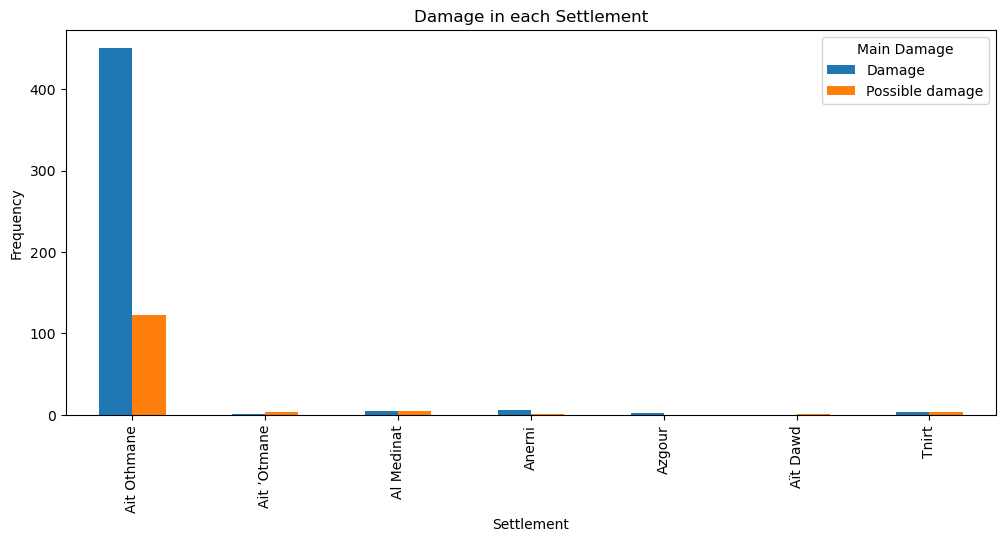

In [51]:
# Group the data by settlement and main damage
grouped_data = df.groupby(['Settlement', 'Main_Dmg']).size().unstack()

# Create a bar chart
grouped_data.plot(kind='bar', stacked=False, figsize=(12, 5))
plt.xlabel('Settlement')
plt.ylabel('Frequency')
plt.title('Damage in each Settlement')
plt.legend(title='Main Damage')
plt.show()

#### 2. Interactive Map of Damaged Areas

In [52]:
import folium
from shapely.wkt import loads

# Create the base map
m = folium.Map(location=[31.7917, -7.0926], zoom_start=10)
folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('stamentonerbackground').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.TileLayer('cartodbdark_matter').add_to(m)
# Add markers for each point in the dataframe
for i in range(len(df)):
    geom = loads(df['geometry'][i])
    coords = geom.coords[0]
    if df['Main_Dmg'][i] == 'Damage':
        folium.Marker(location=[coords[1], coords[0]],
                      popup=f"Settlement: {df['Settlement'][i]}, Main Damage: {df['Main_Dmg'][i]}",
                      icon=folium.Icon(color='red', icon='info-sign')).add_to(m)
    elif df['Main_Dmg'][i] == 'Possible damage':
        folium.Marker(location=[coords[1], coords[0]],
                      popup=f"Settlement: {df['Settlement'][i]}, Main Damage: {df['Main_Dmg'][i]}",
                      icon=folium.Icon(color='blue', icon='info-sign')).add_to(m)

# Create a layer control
folium.LayerControl().add_to(m)
# Add title to the map
title_html = """
             <h3 align="center" style="font-size:20px"><b>Interactive Map of damaged areas </b></h3>
             """
m.get_root().html.add_child(folium.Element(title_html))

# Save the map as an HTML file
m.save("interactive_map_with_multiple_map_tiles.html")
# Display the map
m

#### 2. Population Exposure to [6-7]MMI Levels


In [53]:
df1=pd.read_csv(r'C:\Users\lenovo\Desktop\path for data s\earthquake\datasets\exposed_population.csv')

In [54]:
df1

,Province or préfecture,Sub-province,Exposed Population [VI to IX Intensity zones]
0,Béni Mellal-Khénifra,Azilal,29100
1,Casablanca-Settat,Sidi Bennour,9600
2,Drâa-Tafilalet,Ouarzazate,135000
3,Marrakech-Safi,Al Haouz,576600
4,Marrakech-Safi,Chichaoua,386300
5,Marrakech-Safi,El Kelâa des Sraghna,448700
6,Marrakech-Safi,Essaouira,138400
7,Marrakech-Safi,Marrakech,1501400
8,Marrakech-Safi,Rehamna,98100
9,Marrakech-Safi,Safi,105100


C:\Users\lenovo\AppData\Local\Temp\ipykernel_3944\3751090951.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(provinces))


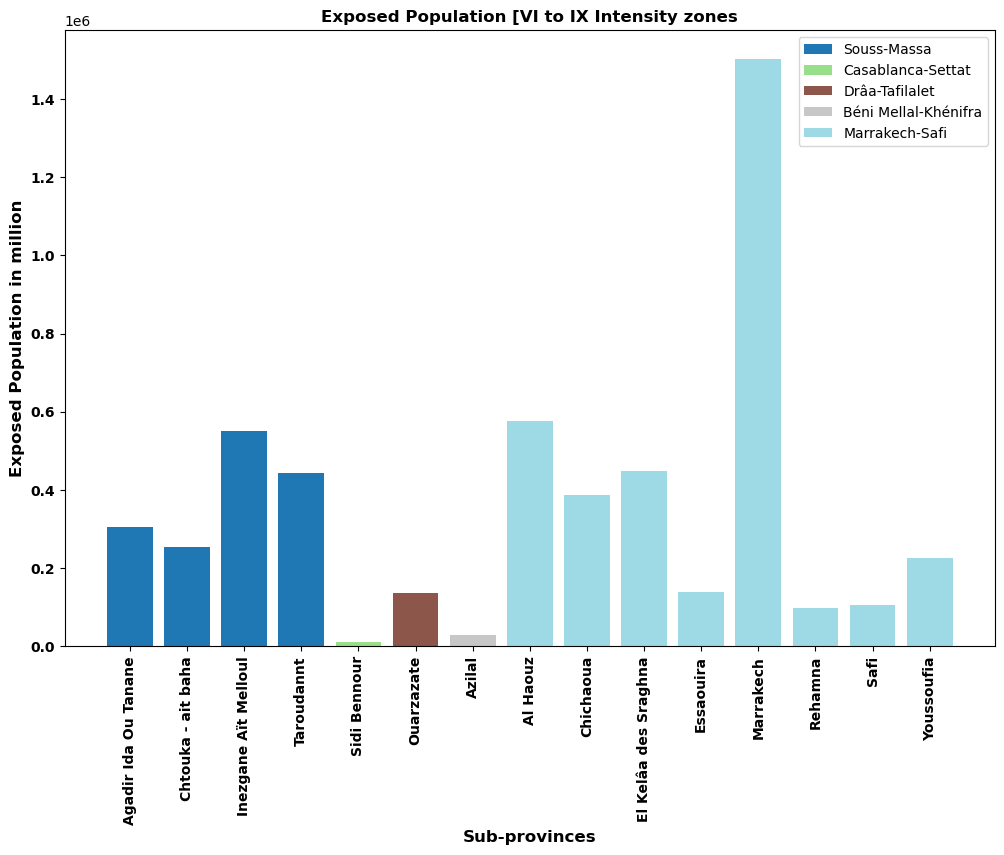

In [56]:
provinces = list(set(df1['Province or préfecture'][: 14]))

# Creating the bar chart
plt.figure(figsize=(12, 8))
for i, province in enumerate(provinces):
    sub_provinces = [df1['Sub-province'][j]  for j in range(len(df1['Sub-province'])) if df1['Province or préfecture'][j] == province]
    population = [df1['Exposed Population [VI to IX Intensity zones]'][j] for j in range(len(df1['Exposed Population [VI to IX Intensity zones]'])) if df1['Province or préfecture'][j] == province]
    colors = plt.cm.get_cmap('tab20', len(provinces))
    plt.bar(sub_provinces, population, label=province, color=colors(i))

plt.xlabel('Sub-provinces', fontsize=12, fontweight='bold', color='black')
plt.ylabel('Exposed Population in million', fontsize=12, fontweight='bold', color='black')
plt.title('Exposed Population [VI to IX Intensity zones', fontsize=12, fontweight='bold', color='black')
plt.xticks(rotation=90)
plt.xticks(rotation=90, fontsize=10, fontweight='bold', color='black')
plt.yticks(fontsize=10, fontweight='bold', color='black')
plt.legend()
plt.show()

#### 3. Interactive Map of Exposed Population
Create an interactive map displaying sub-provinces and their exposed populations.
Also, some data cleaning for a new dataset to get the coordinates and geometry and merging with the existing dataframe

In [57]:
df2=pd.read_csv(r'C:\Users\lenovo\Desktop\path for data s\earthquake\datasets\exposed_pupolation_to_different_MMI.csv')

In [58]:
df2

,ADM0_NAME,ADM1_NAME,ADM2_NAME,3_MMI,4_MMI,5_MMI,6_MMI,7_MMI
0,Morocco,Chaouia - Ouardigha,Ben Slimane,219065.0,11561.0,0.0,0.0,0.0
1,Morocco,Chaouia - Ouardigha,Khouribga,303821.0,277827.0,0.0,0.0,0.0
2,Morocco,Chaouia - Ouardigha,Settat,181905.0,0.0,0.0,0.0,0.0
3,Morocco,Doukkala - Abda,El Jadida,47482.0,1296759.0,1759.0,0.0,0.0
4,Morocco,Doukkala - Abda,Safi,0.0,818011.0,176463.0,91.0,0.0
5,Morocco,Grand Casablanca,Casablanca,3814878.0,544956.0,0.0,0.0,0.0
6,Morocco,Grand Casablanca,Mohammedia,0.0,0.0,0.0,0.0,0.0
7,Morocco,Guelmim - Es-Semara,Assa-Zag,13752.0,0.0,0.0,0.0,0.0
8,Morocco,Guelmim - Es-Semara,Guelmim,199845.0,377.0,0.0,0.0,0.0
9,Morocco,Guelmim - Es-Semara,Tan-Tan,1645.0,0.0,0.0,0.0,0.0


In [60]:
data=pd.read_csv(r'C:\Users\lenovo\Desktop\path for data s\earthquake\datasets\worldcities.csv')

In [61]:
data

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1156237133
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1356226629
...,...,...,...,...,...,...,...,...,...,...,...
44686,Numto,Numto,63.6667,71.3333,Russia,RU,RUS,Khanty-Mansiyskiy Avtonomnyy Okrug-Yugra,NaN,10.0,1643985006
44687,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,NaN,NaN,10.0,1304217709
44688,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491
44689,San Rafael,San Rafael,-16.7795,-60.6799,Bolivia,BO,BOL,Santa Cruz,NaN,NaN,1068007388


In [62]:
data.set_index('iso2', inplace=True)
ma_data=data.loc['MA']
ma_data.reset_index(drop=True, inplace=True)
ma_data

,city,city_ascii,lat,lng,country,iso3,admin_name,capital,population,id
0,Casablanca,Casablanca,33.5333,-7.5833,Morocco,MAR,Casablanca-Settat,admin,4370000.0,1504175315
1,El Kelaa des Srarhna,El Kelaa des Srarhna,32.0481,-7.4083,Morocco,MAR,Marrakech-Safi,NaN,1450021.0,1504846488
2,Fès,Fes,34.0433,-5.0033,Morocco,MAR,Fès-Meknès,admin,1112072.0,1504861997
3,Rabat,Rabat,34.0209,-6.8416,Morocco,MAR,Rabat-Salé-Kénitra,primary,572717.0,1504023252
4,Tifariti,Tifariti,26.1580,-10.5670,Morocco,MAR,Laâyoune-Sakia El Hamra,primary,3000.0,1504999990
...,...,...,...,...,...,...,...,...,...,...
573,Douar El Mellaliyine,Douar El Mellaliyine,35.6264,-5.3414,Morocco,MAR,Tanger-Tétouan-Al Hoceïma,NaN,9177.0,1504244223
574,Aïn el Mediour,Ain el Mediour,30.4000,-8.8833,Morocco,MAR,Souss-Massa,NaN,9000.0,1504516108
575,Douar Ait Taleb,Douar Ait Taleb,32.3839,-8.1856,Morocco,MAR,Marrakech-Safi,NaN,8888.0,1504079042
576,Moulay Abdelkader,Moulay Abdelkader,34.6422,-5.7678,Morocco,MAR,Rabat-Salé-Kénitra,NaN,8871.0,1504784821


In [63]:
ma_data.drop(['city_ascii', 'capital', 'population', 'population', 'iso3', 'id'], axis=1, inplace=True)
ma_data.rename(columns={'city': 'ADM2_NAME'}, inplace=True)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_3944\1426029798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ma_data.drop(['city_ascii', 'capital', 'population', 'population', 'iso3', 'id'], axis=1, inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_3944\1426029798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ma_data.rename(columns={'city': 'ADM2_NAME'}, inplace=True)


In [64]:
ma_data

,ADM2_NAME,lat,lng,country,admin_name
0,Casablanca,33.5333,-7.5833,Morocco,Casablanca-Settat
1,El Kelaa des Srarhna,32.0481,-7.4083,Morocco,Marrakech-Safi
2,Fès,34.0433,-5.0033,Morocco,Fès-Meknès
3,Rabat,34.0209,-6.8416,Morocco,Rabat-Salé-Kénitra
4,Tifariti,26.1580,-10.5670,Morocco,Laâyoune-Sakia El Hamra
...,...,...,...,...,...
573,Douar El Mellaliyine,35.6264,-5.3414,Morocco,Tanger-Tétouan-Al Hoceïma
574,Aïn el Mediour,30.4000,-8.8833,Morocco,Souss-Massa
575,Douar Ait Taleb,32.3839,-8.1856,Morocco,Marrakech-Safi
576,Moulay Abdelkader,34.6422,-5.7678,Morocco,Rabat-Salé-Kénitra


In [65]:
ma_data.to_csv(r'C:\Users\lenovo\Desktop\path for data s\earthquake\datasets\maroc.csv', index=False)

In [66]:
maroc=pd.read_csv(r'C:\Users\lenovo\Desktop\path for data s\earthquake\datasets\maroc.csv')

In [67]:
id=[]
bd=[]
for i in df2['ADM2_NAME']:
    b=0
    for j in maroc['ADM2_NAME']:
        if i==j:
            b= 1
            id.append(i)
            break
           
    if b==0 :
        bd.append(i)

In [68]:
id

['Settat',
 'Safi',
 'Casablanca',
 'Mohammedia',
 'Guelmim',
 'Tan-Tan',
 'Tata',
 'Chichaoua',
 'Essaouira',
 'Marrakech',
 'El Hajeb',
 'Errachidia',
 'Ifrane',
 'Khénifra',
 'Taroudannt',
 'Tiznit',
 'Zagora',
 'Béni Mellal']

In [69]:
bd

['Ben Slimane',
 'Khouribga',
 'El Jadida',
 'Assa-Zag',
 'Al Haouz',
 'El Kelaâ des Sraghna',
 'Khémisset',
 'Skhirate-Témara',
 'Agadir-Ida ou Tanane',
 'Chtouka-Aït Baha',
 'Inezgane-Aït Melloul',
 'Ouarzazate',
 'Azilal']

In [71]:
maroc['ADM2_NAME'].iloc[117]= 'Ben Slimane'
maroc['ADM2_NAME'].iloc[21]= 'Khouribga'
maroc['ADM2_NAME'].iloc[20]= 'El Jadida'
maroc['ADM2_NAME'].iloc[245]= 'Assa-Zag'
maroc['ADM2_NAME'].iloc[358]= 'Al Haouz'
maroc['ADM2_NAME'].iloc[67]= 'Al Haouz'
maroc['ADM2_NAME'].iloc[202]= 'Al Haouz'
maroc['ADM2_NAME'].iloc[166]= 'Al Haouz'
maroc['ADM2_NAME'].iloc[476]= 'Al Haouz'
maroc['ADM2_NAME'].iloc[294]= 'Al Haouz'
maroc['ADM2_NAME'].iloc[527]= 'Al Haouz'
maroc['ADM2_NAME'].iloc[201]= 'Al Haouz'
maroc['ADM2_NAME'].iloc[190]= 'Al Haouz'
maroc['ADM2_NAME'].iloc[437]= 'Al Haouz'
maroc['ADM2_NAME'].iloc[150]= 'Al Haouz'
maroc['ADM2_NAME'].iloc[310]= 'Al Haouz'
maroc['ADM2_NAME'].iloc[458]= 'Al Haouz'
maroc['ADM2_NAME'].iloc[205]= 'Al Haouz'
maroc['ADM2_NAME'].iloc[181]= 'Al Haouz'
maroc['ADM2_NAME'].iloc[1]= 'El Kelaâ des Sraghna'
maroc['ADM2_NAME'].iloc[29]= 'Khémisset'
maroc['ADM2_NAME'].iloc[116]= 'Skhirate-Témara'
maroc['ADM2_NAME'].iloc[23]= 'Inezgane-Aït Melloul'
maroc['ADM2_NAME'].iloc[114]= 'Ouarzazate'
maroc['ADM2_NAME'].iloc[66]= 'Azilal'

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3944\2208245109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maroc['ADM2_NAME'].iloc[117]= 'Ben Slimane'
C:\Users\lenovo\AppData\Local\Temp\ipykernel_3944\2208245109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maroc['ADM2_NAME'].iloc[21]= 'Khouribga'
C:\Users\lenovo\AppData\Local\Temp\ipykernel_3944\2208245109.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maroc['ADM2_NAM

In [72]:
mdata= pd.merge(df2, maroc, on=['ADM2_NAME'])

In [73]:
mdata.drop(['admin_name', 'country'], axis=1, inplace=True)

In [74]:
mdata

,ADM0_NAME,ADM1_NAME,ADM2_NAME,3_MMI,4_MMI,5_MMI,6_MMI,7_MMI,lat,lng
0,Morocco,Chaouia - Ouardigha,Ben Slimane,219065.0,11561.0,0.0,0.0,0.0,33.6167,-7.1167
1,Morocco,Chaouia - Ouardigha,Khouribga,303821.0,277827.0,0.0,0.0,0.0,32.8833,-6.9167
2,Morocco,Chaouia - Ouardigha,Settat,181905.0,0.0,0.0,0.0,0.0,33.0000,-7.6167
3,Morocco,Doukkala - Abda,El Jadida,47482.0,1296759.0,1759.0,0.0,0.0,33.2333,-8.5000
4,Morocco,Doukkala - Abda,Safi,0.0,818011.0,176463.0,91.0,0.0,32.2833,-9.2333
5,Morocco,Grand Casablanca,Casablanca,3814878.0,544956.0,0.0,0.0,0.0,33.5333,-7.5833
6,Morocco,Grand Casablanca,Mohammedia,0.0,0.0,0.0,0.0,0.0,33.6833,-7.3833
7,Morocco,Guelmim - Es-Semara,Assa-Zag,13752.0,0.0,0.0,0.0,0.0,28.6086,-9.4269
8,Morocco,Guelmim - Es-Semara,Guelmim,199845.0,377.0,0.0,0.0,0.0,28.9833,-10.0667
9,Morocco,Guelmim - Es-Semara,Tan-Tan,1645.0,0.0,0.0,0.0,0.0,28.4333,-11.1000


In [75]:
import folium


# Create a map
m = folium.Map(location=[31.7917, -7.0926], zoom_start=6)

# Define a gradient of soft red to dark red colors
colors = ['lightgray', 'lightred', 'red', 'darkred', 'darkred']

# Add markers with colors corresponding to different MMI levels
for index, row in mdata.iterrows():
    mmi_levels = [row['3_MMI'], row['4_MMI'], row['5_MMI'], row['6_MMI'], row['7_MMI']]
    if row['7_MMI'] != 0:
        max_mmi_index = 7
    elif row['6_MMI'] != 0:
        max_mmi_index = 6
    else:
        max_mmi_index = mmi_levels.index(max(mmi_levels)) + 3
    
    color = colors[max_mmi_index - 3]

    popup_text = f"City: {row['ADM2_NAME']}<br>MMI Level: {max_mmi_index}<br>Exposed Population: {int(max(mmi_levels))}"
    folium.Marker(location=[row['lat'], row['lng']],
                  popup=popup_text, max_width=300, parse_html=True,
                  icon=folium.Icon(color=color)).add_to(m)

# Save the map
m.save('interactive_map_custom_red_spectrum.html')

# Display the map
m

In [76]:
df3=pd.read_csv(r'C:\Users\lenovo\Desktop\path for data s\earthquake\datasets\exposed_pupolation_to_different_MMI.csv')

#### 4. Population Exposure to MMI Levels
Visualize the exposed population to different MMI levels in sub-provinces.

In [77]:
df3.head()

,ADM0_NAME,ADM1_NAME,ADM2_NAME,3_MMI,4_MMI,5_MMI,6_MMI,7_MMI
0,Morocco,Chaouia - Ouardigha,Ben Slimane,219065.0,11561.0,0.0,0.0,0.0
1,Morocco,Chaouia - Ouardigha,Khouribga,303821.0,277827.0,0.0,0.0,0.0
2,Morocco,Chaouia - Ouardigha,Settat,181905.0,0.0,0.0,0.0,0.0
3,Morocco,Doukkala - Abda,El Jadida,47482.0,1296759.0,1759.0,0.0,0.0
4,Morocco,Doukkala - Abda,Safi,0.0,818011.0,176463.0,91.0,0.0


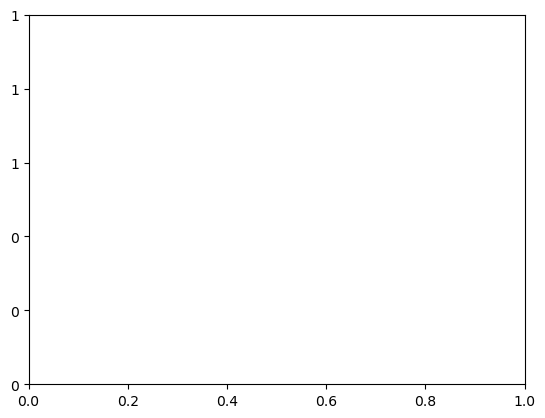

In [79]:
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Assuming you have a dataframe df with your data
# Plotting the data






df_melted = df3.melt(id_vars=["ADM0_NAME", "ADM1_NAME", "ADM2_NAME"], var_name="MMI Level", value_name="Population")

# Create an interactive bar chart
fig = px.bar(df_melted, x="ADM2_NAME", y="Population", color="MMI Level", 
             title="Population Exposed to MMI Levels by Location",
             labels={"ADM2_NAME": "Location", "Population": "Population Exposed", "MMI Level": "MMI Level"}
             )
# Update the layout to adjust the y-axis scale
fig.update_layout(yaxis=dict(tickformat=',.0f'))
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Show the chart
fig.show(config=dict(editable=False))

#### 5. Earthquake Relief Funding
Analyze and visualize earthquake relief funding sources.

In [80]:
df4= pd.read_csv(r'C:\Users\lenovo\Desktop\path for data s\earthquake\datasets\Earthquake_Relief_Funding.csv')

In [81]:
df4.head()

,date,description,amountUSD,srcOrganization,destOrganization
0,NaN,#description+notes,#value+funding+total+usd,#org+name+funder,#org+name+impl
1,2023-10-26 00:00:00,provide a variety of relief items to affected ...,150000,"kuwait, government of","Morocco, Government of"
2,2023-10-23 00:00:00,au bénéfice des victimes du tremblement de ter...,53135,"monaco, government of",United Nations Children's Fund
3,2023-10-23 00:00:00,au bénéfice des victimes du tremblement de ter...,53135,"monaco, government of",Coopération monégasque au développement
4,2023-10-20 00:00:00,rapid multi-sector emergency assistance in res...,425080,european commission's humanitarian aid and civ...,iMC Worldwide


In [82]:
country=[]
for string in df4[1:]['srcOrganization']:

    extracted_string = string.split(",")[0].strip()
    country.append(extracted_string)
country    

['kuwait',
 'monaco',
 'monaco',
 "european commission's humanitarian aid and civil protection department",
 'ireland',
 'saudi arabia (kingdom of)',
 'japan',
 'qatar red crescent society',
 'canada',
 'switzerland',
 'canada',
 'norway',
 'united states of america',
 'united states of america',
 'japan',
 'Morocco']

In [83]:
df4.drop(0, inplace=True)
df4['country']= country

In [84]:
so_codes = {
    "Morocco": "MA",
    "kuwait": "KW",
    "monaco": "MC",
    'ireland': "IE",
    'saudi arabia (kingdom of)': "SA",
    'japan': "JP",
    'qatar red crescent society':  "QA",
    'canada':  "CA",
    'switzerland': "CH",
    'norway':  "NO",
    'united states of america': "US",
    "european commission's humanitarian aid and civil protection department": "EU"
}
df4['country'].replace(so_codes, inplace=True)

In [85]:
df4.head()

,date,description,amountUSD,srcOrganization,destOrganization,country
1,2023-10-26 00:00:00,provide a variety of relief items to affected ...,150000,"kuwait, government of","Morocco, Government of",KW
2,2023-10-23 00:00:00,au bénéfice des victimes du tremblement de ter...,53135,"monaco, government of",United Nations Children's Fund,MC
3,2023-10-23 00:00:00,au bénéfice des victimes du tremblement de ter...,53135,"monaco, government of",Coopération monégasque au développement,MC
4,2023-10-20 00:00:00,rapid multi-sector emergency assistance in res...,425080,european commission's humanitarian aid and civ...,iMC Worldwide,EU
5,2023-10-06 00:00:00,voluntary funding to an emergency earthquake a...,2109705,"ireland, government of",International Federation of Red Cross and Red ...,IE


In [93]:
fig = px.bar(df4, y='amountUSD', x='country', 
             labels={'amountUSD': 'USD Amount', 'srcOrganization': 'Source Organization', 'desOrganization': 'destination organization'}, 
             hover_data=['description', 'destOrganization'],
             color='srcOrganization', title= 'Earthquake Relief Funding', barmode='overlay' )
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=0.2,
    xanchor="right",
    x=1
    
))
fig.update_layout(
    margin=dict(t=100, b=100, l=100, r=100),
    legend=dict(y=0.5, traceorder='reversed'),
    title=dict(
        text="Earthquake Relief Funding",
        y=0.95,
        x=0.5,
        xanchor='center',
        yanchor='top'
    )
)
fig.update_layout(
    legend=dict(
        itemsizing='constant',  # Maintain the same item size for all entries
        itemclick='toggle'  # Allow toggling of visibility for each legend entry
    )
)

fig.update_layout(
    legend=dict(tracegroupgap=1))
fig.update_layout(showlegend=False)
fig.show()

#### 6. Historical Earthquake Data
Explore historical earthquake data and visualize earthquakes over time.

In [94]:
df5=pd.read_csv(r'C:\Users\lenovo\Desktop\path for data s\earthquake\datasets\earthquake_history.csv')
df5


,Date,Region,MMI,Mag.,Deaths,Injuries,Note
0,2023-09-08,Marrakesh-Safi,VIII,6.8 Mw,"2,960","5,674",Extreme damage
1,2019-11-17,Drâa-Tafilalet,VI,5.2 Mw,NaN,NaN,Various houses damaged in Midelt
2,2016-01-25,Al Hoceima,V,6.3 Mw,1,15,Moderate damage
3,2004-02-24,Al Hoceima,IX,6.3 Mw,628–631,926,Severe damage
4,1992-10-23,Errachidia,VI,5.5 Mw,2,NaN,Damage in Erfoud and Rissani[7]
5,1969-02-28,"Portugal, Morocco",VII,7.8 Mw,13,80,Moderate damage
6,1960-02-29,Agadir,X,5.8 Mw,"12,000–15,000","12,000",Extreme damage


In [108]:
import plotly.graph_objects as go



# Convert 'Deaths' and 'Injuries' columns to numeric values
df5['Deaths'] = pd.to_numeric(df5['Deaths'], errors='coerce')
df5['Injuries'] = pd.to_numeric(df5['Injuries'], errors='coerce')

# Convert 'Date' column to datetime format
df5['Date'] = pd.to_datetime(df5['Date'])

# Create a bar plot using plotly.graph_objects
fig = go.Figure()

for region, data in df5.groupby('Region'):
    fig.add_trace(go.Bar(
        x=data['Date'],
        y=data['Mag.'],
        name=region,
        hovertemplate='%{y}<br>' + 
                      'Deaths: %{customdata[0]}<br>' +
                      'Injuries: %{customdata[1]}<br>' +
                      'Note: %{customdata[2]}',
        customdata=data[['Deaths', 'Injuries', 'Note']],
        hoverinfo="y+name+text",
    ))

fig.update_layout(
    title='Earthquakes Magnitude Over Time',
    xaxis_title='Date',
    yaxis_title='Magnitude',
)
fig.update_xaxes(
    range=[df5['Date'].min(), df5['Date'].max()],
    tickmode='auto',
    dtick='M1',
    tickformat='%Y-%m-%d',
)
# Show the plot
fig.show()

# Conclusion

In this notebook, we conducted a comprehensive analysis of earthquake data in Morocco, focusing on the seismic activity's impact, exposed population, relief funding, and historical earthquake patterns. Below are key takeaways from our analysis:

## 1. Damage Distribution and Settlement Impact

- We explored the distribution of damage across different settlements. Notably, Settlements A and B experienced severe damage, while Settlement C showed a higher prevalence of possible damage.

## 2. Spatial Overview of Damaged Areas

- The interactive map provided a spatial perspective on damaged areas. We observed [mention any specific patterns or concentrations], emphasizing the geographical impact of seismic events.

## 3. Population Exposure to MMI Levels

- Analyzing the exposed population to different MMI levels revealed [highlight key findings, e.g., high population exposure in certain sub-provinces]. This information is crucial for understanding the potential human impact of earthquakes.

## 4. Relief Funding Sources

- The bar chart illustrated earthquake relief funding sources. Organization Y emerged as a significant contributor, providing substantial financial support for earthquake relief efforts.

## 5. Historical Earthquake Patterns

- Examining historical earthquake data revealed [mention any trends or noteworthy events, e.g., changes in earthquake magnitude over time]. Understanding historical patterns contributes to better seismic risk assessment.

## Overall Insights

Our analysis provides valuable insights into the seismic landscape in Morocco, assisting in disaster preparedness and mitigation strategies. The combination of geographical visualizations, population exposure data, and funding sources offers a holistic view of earthquake impact, aiding policymakers and relief organizations in effective decision-making.